# HEART DISEASES-DATA SET

Propose an ANN classifier that allows to predict with high accuracy diagnostic.

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #standardize the data
from sklearn.neural_network import MLPClassifier #use the neural network MLPClassifier

#use some metrics to analyze results
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [2]:
#create a data frame and read the file
df=pd.DataFrame()
df = pd.read_excel('D:/Neural_Network/exam/heart_diseases/heart_disease_for_curves.xls',header=0)

df.head()

,sample,cholesteral,thalac,oldpeak,disease
0,train,261,141,3,positive
1,train,263,105,2,negative
2,train,269,121,2,negative
3,train,177,140,4,negative
4,train,256,142,6,positive


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cholesteral,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
thalac,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
oldpeak,270.0,10.500000,11.452098,0.0,0.0,8.0,16.0,62.0


transform the disease column into a new label with 1 for positive and 0 for negative

In [4]:
df = pd.get_dummies(df, columns=['disease'], drop_first=True)
df.rename(columns={'disease_positive':'label'}, inplace=True)
df.head()

,sample,cholesteral,thalac,oldpeak,label
0,train,261,141,3,1
1,train,263,105,2,0
2,train,269,121,2,0
3,train,177,140,4,0
4,train,256,142,6,1


create the training samples X_train and y_train of the row 0 to 150 for training the model

In [5]:
#All the column without the column sample and label for X_train:
X=df.drop(['sample','label'],axis=1)[0:150]
print(X.head(3))

#Only the column label for the y_train:
y_train=df['label'][0:150]
print(y_train.head(3))

   cholesteral  thalac  oldpeak
0          261     141        3
1          263     105        2
2          269     121        2
0    1
1    0
2    0
Name: label, dtype: uint8


Data processing: 
the Multi-layer Perceptron is sensitive to feature scaling.  I will use the built-in StandardScaler for standardization the data.
I will apply the same scaling for the training set X_train and the test set X_test .    


In [6]:
scaler = StandardScaler()

# Fit only to the training data X:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data X:
X_train = scaler.transform(X)
X_train.shape

(150, 3)

MLPClassifier implements a multi-layer perceptron (MLP) supports multi-class classification by applying Softmax as the output function.
Further, the model supports multi-label classification in which a sample can belong to more than one class, 
I choose 2 hidden layers with the same number of 10 neurons ,
I choose the activation 'tanh':hyperbolic tan function and the solver 'adam':refers to a stochastic gradient-based optimizer, 
With these parameters for the data, the model converge easily to the minimum.

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10),activation='tanh',solver='adam', alpha=1e-8)

mlp.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=1e-08, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Evaluate the model with predictions:
I apply the same StandardScaler on the X_test to standardize the data to predict.

In [15]:
#define the data for predictions X_test of the row 150 at the end:
X_test=df.drop(['sample','label'],axis=1)[150:]

#define the data to compare with the predictions of the row 150 at the end:
y_test=df['label'][150:]

#apply the StandardScaler transformations to the data X_test:
X_test = scaler.transform(X_test)

#pred the data with the mlp model:
predictions = mlp.predict(X_test)
#predictions

I use SciKit-Learn’s built in metrics with a classification report, accuracy score and confusion matrix to evaluate how well the model performed.

In [16]:
#classification report:
print(classification_report(y_test,predictions))
#accuracy score:
print("####################################################")
print('The score is {}'.format(accuracy_score(y_test,predictions, normalize=True)))

             precision    recall  f1-score   support

          0       0.76      0.79      0.78        66
          1       0.73      0.70      0.72        54

avg / total       0.75      0.75      0.75       120

####################################################
The score is 0.75


I have a score around 75%, the model predict well  the data of the X_test.

below, you have the confusion matrix with the true positive and the others.

In [17]:
#confusion matrix for Tn,Fp,Fn,Tp
confusion=confusion_matrix(y_test,predictions)
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()

print(confusion)
print("##############################")
print('True Positive is {}'.format(tp))
print('True Negative is {}'.format(tn))
print('False Positive is {}'.format(fp))
print('False Negative is {}'.format(fn))


[[52 14]
 [16 38]]
##############################
True Positive is 38
True Negative is 52
False Positive is 14
False Negative is 16


# DEBUGGING ALGORITHM: 

# learning curves

this diagnostic tools, can help us to improve the performance of a learning algorithm.
By plotting the model training and validation accuracies as functions of the training set size, we can easily detect whether the model suffers from high variance or high bias.

In [18]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr=make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',random_state=1))

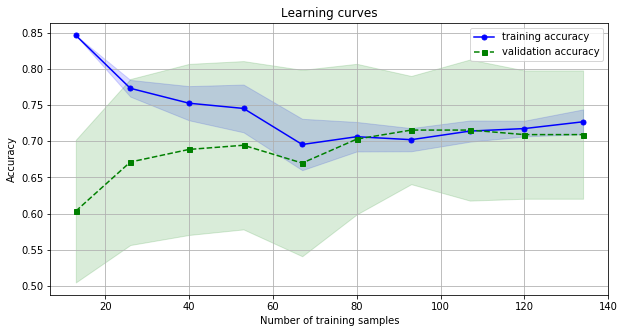

In [19]:
train_sizes, train_scores, test_scores=learning_curve(estimator=pipe_lr,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=1)

train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

plt.figure(figsize=(10,5))
#calculate the average accuracies from the returned cross-validated training scores for the different size of the training set
plt.plot(train_sizes,train_mean,color='b',marker='o',markersize=5,label='training accuracy')
#variance of the estimate:standard deviation of the training average accuracy 
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std,alpha=0.15, color='blue')
#calculate the average accuracies from the returned cross-validated test scores for the different size of the training set
plt.plot(train_sizes, test_mean, color='green',linestyle='--', marker='s',markersize=5,label='validation accuracy')
#variance of the estimate:standard deviation of the validation average accuracy 
plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std,alpha=0.15, color='green')

plt.grid()
plt.title('Learning curves')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

the model has a good bias-variance trade off. 


# Estimate the performance of the classifier:


# Validation curves 

Validation curves are useful for improving the performance of a model by addressing issues such as overfitting or underfitting.
Validation curves are related to learning curves, but instead of plotting the training and test accuracies as funcions of the sample size, we vary the values of the model parameters. for example the inverse regularization parameter C in logisticRegression.

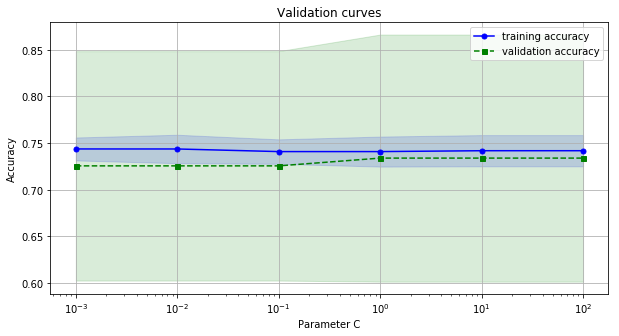

In [20]:
param_range=[0.001,0.01,0.1,1.0,10.0,100.0]
train_scores, test_scores=validation_curve(estimator=pipe_lr,X=X_test,y=y_test,param_name='logisticregression__C',cv=10,param_range=param_range)

train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

plt.figure(figsize=(10,5))

plt.plot(param_range,train_mean,color='b',marker='o',markersize=5,label='training accuracy')

plt.fill_between(param_range,train_mean + train_std, train_mean - train_std,alpha=0.15, color='blue')

plt.plot(param_range, test_mean, color='green',linestyle='--', marker='s',markersize=5,label='validation accuracy')

plt.fill_between(param_range,test_mean + test_std, test_mean - test_std,alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.title('Validation curves')
plt.legend(loc='upper right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.show()

the validation curves function uses stratified k-fold cross-validation by default to estimate the performance of the classifier. i evaluate the parameter C the inverse regularization parameter.
the model fit well the data without overfitting or underfitting